In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = sns.load_dataset('iris')

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='petal_length'>

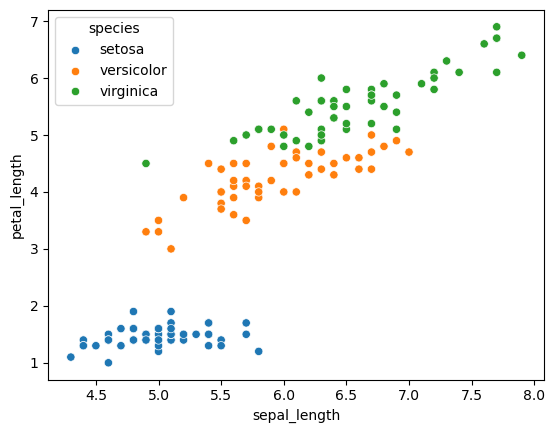

In [11]:
sns.scatterplot(iris, x= 'sepal_length', y= 'petal_length', hue= 'species')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

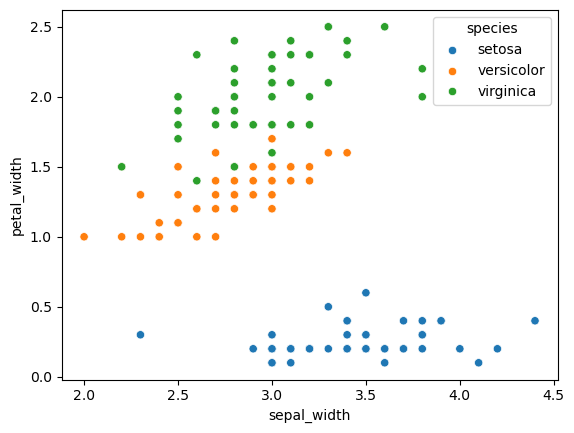

In [13]:
sns.scatterplot(iris, x= 'sepal_width', y= 'petal_width', hue= 'species')

In [17]:
 num_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [19]:
X = iris[num_cols]

In [21]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
from sklearn.cluster import KMeans

In [79]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

In [29]:
model = KMeans(n_clusters = 3, random_state = 42)

In [31]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [33]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [35]:
preds = model.predict(X)

In [37]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

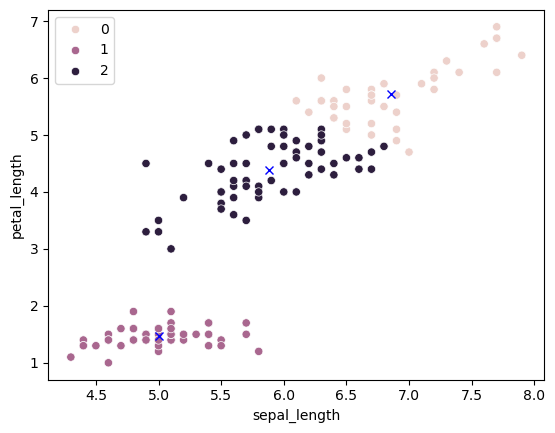

In [43]:
sns.scatterplot(X, x= 'sepal_length', y= 'petal_length', hue= preds)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [45]:
#total variance of all the individual clusters
model.inertia_

78.8556658259773

In [47]:
model2 = KMeans(n_clusters=6, random_state=42).fit(X)

In [53]:
preds2 = model2.predict(X)
preds2

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

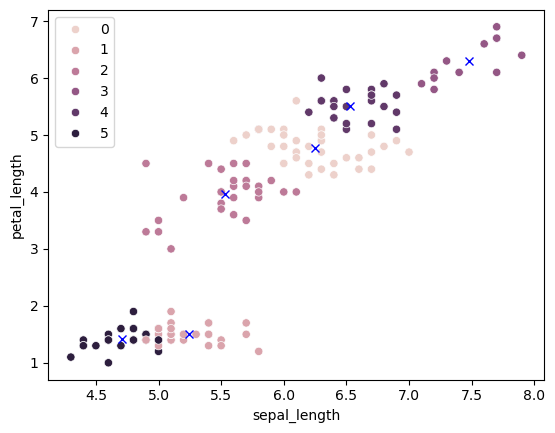

In [55]:
sns.scatterplot(X, x= 'sepal_length', y= 'petal_length', hue= preds2)
centers_x, centers_y = model2.cluster_centers_[:,0], model2.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [57]:
model2.inertia_

39.066035353535355

In [59]:
options = range(2, 11)
inertias = []
for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

Text(0, 0.5, 'Inertia')

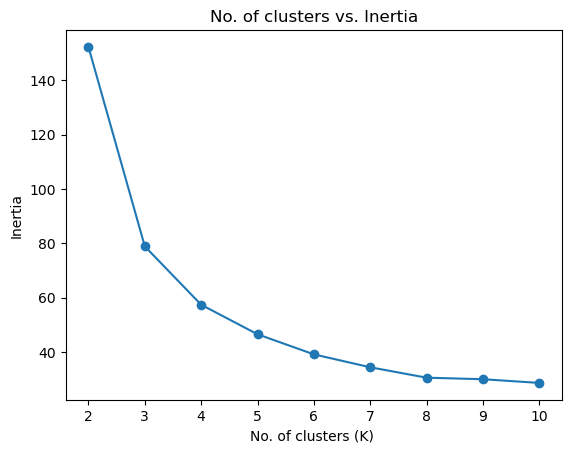

In [65]:
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o') 
plt.xlabel ( 'No. of clusters (K) ') 
plt.ylabel ( 'Inertia')

### DBSCAN takes epsilon value which is just the radius for a circle, and the min sample, if the circle have min samplesthen it is a cluster

In [75]:
from sklearn.cluster import DBSCAN

In [77]:
?DBSCAN

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

This implementation has a worst case memory complexity of :math:`O({n}^2)`,
which can occur when the `eps` param is large and `min_samples` is low,
while the original DBSCAN only uses linear memory.
For further details, see the Notes below.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
 

In [81]:
MODEL = DBSCAN(
        eps=1.1,
        min_samples=4,
    )

In [ ]:
MODEL.fi